In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from itertools import cycle

In [56]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset=dataset.drop('CustomerID',axis=1)

x=dataset[['Annual Income (k$)','Spending Score (1-100)']]

In [57]:
sc=StandardScaler()
x_prepinp=sc.fit_transform(x)

In [58]:
#x=dataset.iloc[:,[3,4]].values
#dataset1=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#dataset2=dataset[["Age","Genre","Annual Income (k$)","Spending Score (1-100)"]]

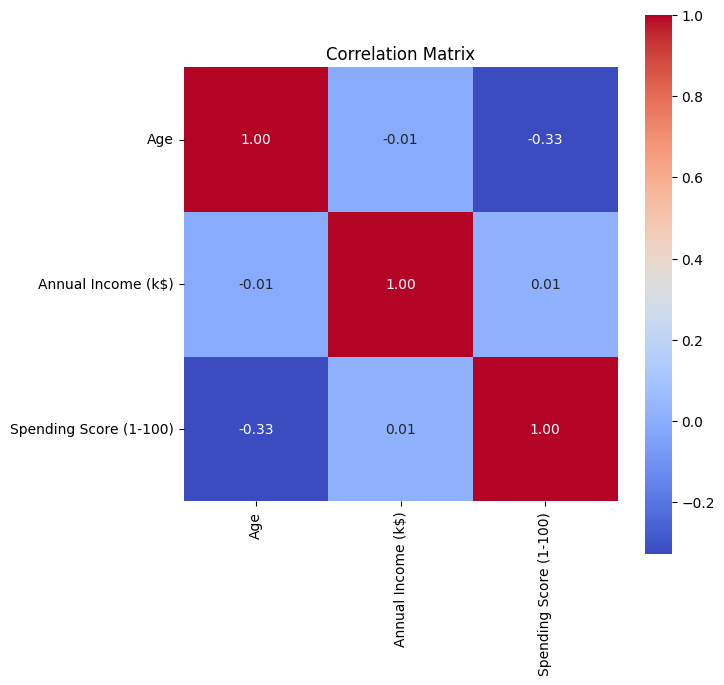

In [59]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",square=True)
plt.title("Correlation Matrix")
plt.show()

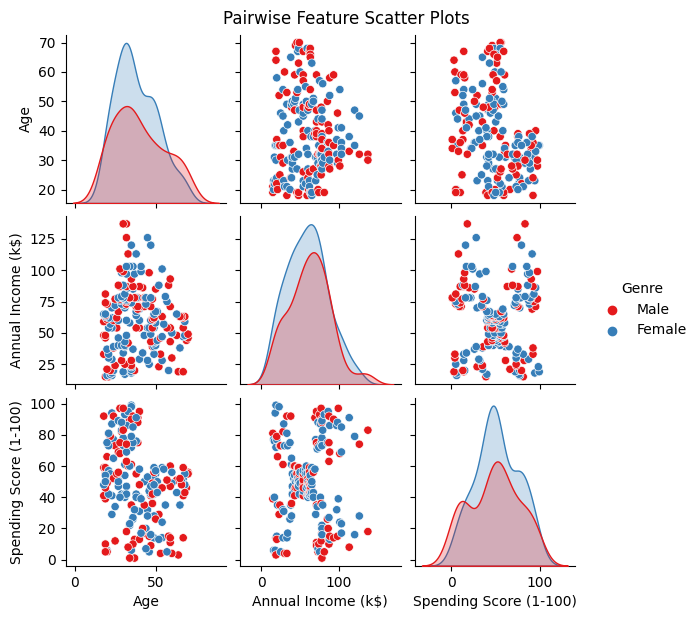

In [60]:
sns.pairplot(dataset, palette="Set1", hue="Genre", diag_kind="kde", height=2)
plt.suptitle("Pairwise Feature Scatter Plots", y=1.02)
plt.show()

C:\Users\Dayana\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
C:\Users\Dayana\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
C:\Users\Dayana\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


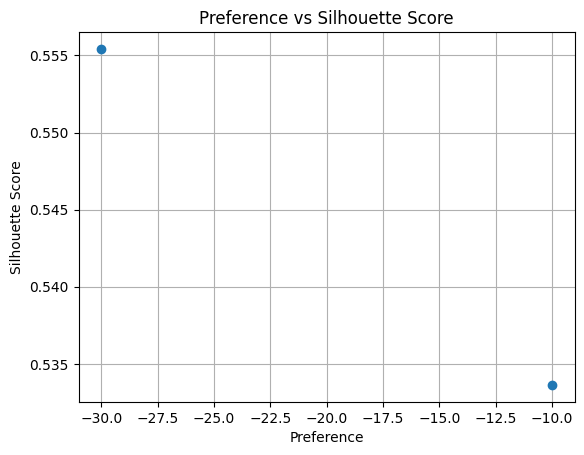

In [61]:
from sklearn import metrics
Preference = [-50, -40, -30, -20, -10]
silhouette_scores = []

for preference in Preference:
    model = AffinityPropagation(preference=preference, random_state=42)
    model.fit(x_prepinp)
    
    # Evaluate only if more than one cluster is found
    if len(np.unique(model.labels_)) > 1:
        score = metrics.silhouette_score(x_prepinp, model.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

plt.plot(Preference, silhouette_scores, marker='o')
plt.title('Preference vs Silhouette Score')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [62]:
af = AffinityPropagation(preference=-30, max_iter=50, damping=0.7,
                         random_state=42, convergence_iter=20).fit(x_prepinp)

cluster_labels = af.labels_
print("Cluster labels:", cluster_labels)

Cluster labels: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [64]:
silhouette_score = metrics.silhouette_score(x_prepinp, cluster_labels)
print(f"Silhouette Score: {silhouette_score:.4f}")

Silhouette Score: 0.5530


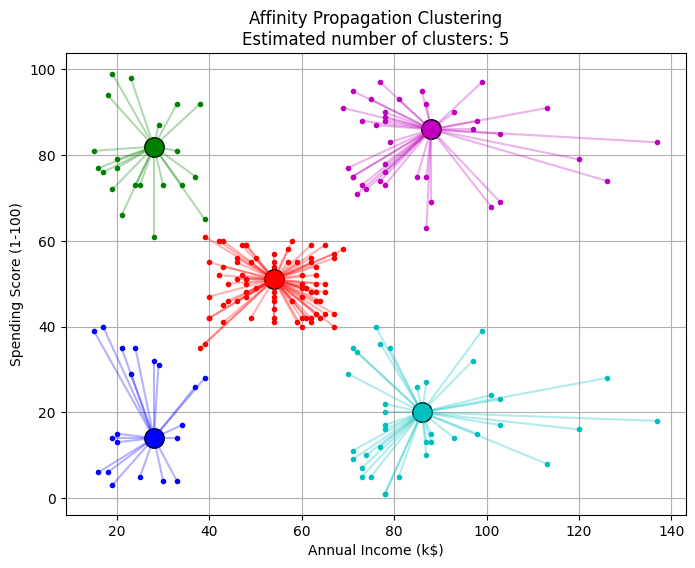

In [63]:
plt.figure(figsize=(8, 6))
colors = cycle('bgrcmyk')

n_clusters_ = len(af.cluster_centers_indices_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = x.iloc[cluster_centers_indices[k]]

    plt.plot(x.iloc[class_members, 0], x.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=col, markeredgecolor='k', markersize=14)

    for X in x.iloc[class_members].values:
        plt.plot([cluster_center[0], X[0]], [cluster_center[1], X[1]], col, alpha=0.3)

plt.title(f'Affinity Propagation Clustering\nEstimated number of clusters: {n_clusters_}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()